# Assume that seller A, one of our clients, had a gross revenue of 10 billion VND or more in July. They plan to double this feat in August. As a result, our August KPI is to attain 20 billion VND in gross income, and it is our obligation to offer a clear action plan for achieving that KPI.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel
import seaborn as sns
sns.set()
import matplotlib.dates as mdates
import datetime as dt

from scipy.stats import boxcox
from os import listdir

In [ ]:
data = pd.read_csv('sample.csv')
data

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status
0,1,A000000001,1,7/1/2019,338000,259000,3000,0,0,Airpay GIRO,CANCELLED
1,2,A000000002,1,7/1/2019,175000,139000,0,0,0,Cash on Delivery,COMPLETED
2,3,A000000003,1,7/1/2019,520000,359000,14927,0,0,Cybersource,COMPLETED
3,4,A000000004,1,7/1/2019,238000,185000,29645,0,0,Cash on Delivery,COMPLETED
4,5,A000000005,1,7/1/2019,159000,129000,14927,0,0,Cash on Delivery,CANCELLED
...,...,...,...,...,...,...,...,...,...,...,...
61723,30091,A000037831,1,7/30/2019,155000,119000,10000,0,0,Cash on Delivery,COMPLETED
61724,30511,A000037832,1,7/30/2019,475000,399000,10000,0,0,Cash on Delivery,COMPLETED
61725,30512,A000037833,1,7/30/2019,135000,99000,35641,0,0,Cash on Delivery,COMPLETED
61726,30513,A000037834,1,7/30/2019,350000,209000,0,0,0,VN Airpay Ibanking (Techcombank),CANCELLED


In [ ]:
data.shape

(61728, 11)

In [ ]:
data.head()

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status
0,1,A000000001,1,7/1/2019,338000,259000,3000,0,0,Airpay GIRO,CANCELLED
1,2,A000000002,1,7/1/2019,175000,139000,0,0,0,Cash on Delivery,COMPLETED
2,3,A000000003,1,7/1/2019,520000,359000,14927,0,0,Cybersource,COMPLETED
3,4,A000000004,1,7/1/2019,238000,185000,29645,0,0,Cash on Delivery,COMPLETED
4,5,A000000005,1,7/1/2019,159000,129000,14927,0,0,Cash on Delivery,CANCELLED


In [ ]:
data.describe()

,customer_unique_id,item_quantity,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller
count,61728.000000,61728.000000,6.172800e+04,6.172800e+04,61728.000000,61728.0,61728.0
mean,14323.092260,1.111748,2.347072e+05,1.514818e+05,11191.105689,0.0,0.0
std,8050.804821,1.487318,1.574884e+05,1.178384e+05,16157.498442,0.0,0.0
min,1.000000,1.000000,1.000000e+03,0.000000e+00,0.000000,0.0,0.0
25%,7954.000000,1.000000,1.500000e+05,8.900000e+04,0.000000,0.0,0.0
50%,13852.500000,1.000000,1.950000e+05,1.250000e+05,3000.000000,0.0,0.0
75%,20361.250000,1.000000,2.580000e+05,1.790000e+05,16000.000000,0.0,0.0
max,30513.000000,198.000000,1.750000e+06,1.579000e+06,384500.000000,0.0,0.0


In [ ]:
data.dtypes

customer_unique_id        int64
order_id                 object
item_quantity             int64
created_day              object
onsite_original_price     int64
selling_price             int64
shipping_fee              int64
voucher_platform          int64
voucher_seller            int64
payment_method           object
order_status             object
dtype: object

In [ ]:
data.dtypes[data.dtypes=='object']

order_id          object
created_day       object
payment_method    object
order_status      object
dtype: object

# Find missing value

In [ ]:
missing_percentage = data.isnull().sum()
missing_percentage

customer_unique_id       0
order_id                 0
item_quantity            0
created_day              0
onsite_original_price    0
selling_price            0
shipping_fee             0
voucher_platform         0
voucher_seller           0
payment_method           0
order_status             0
dtype: int64

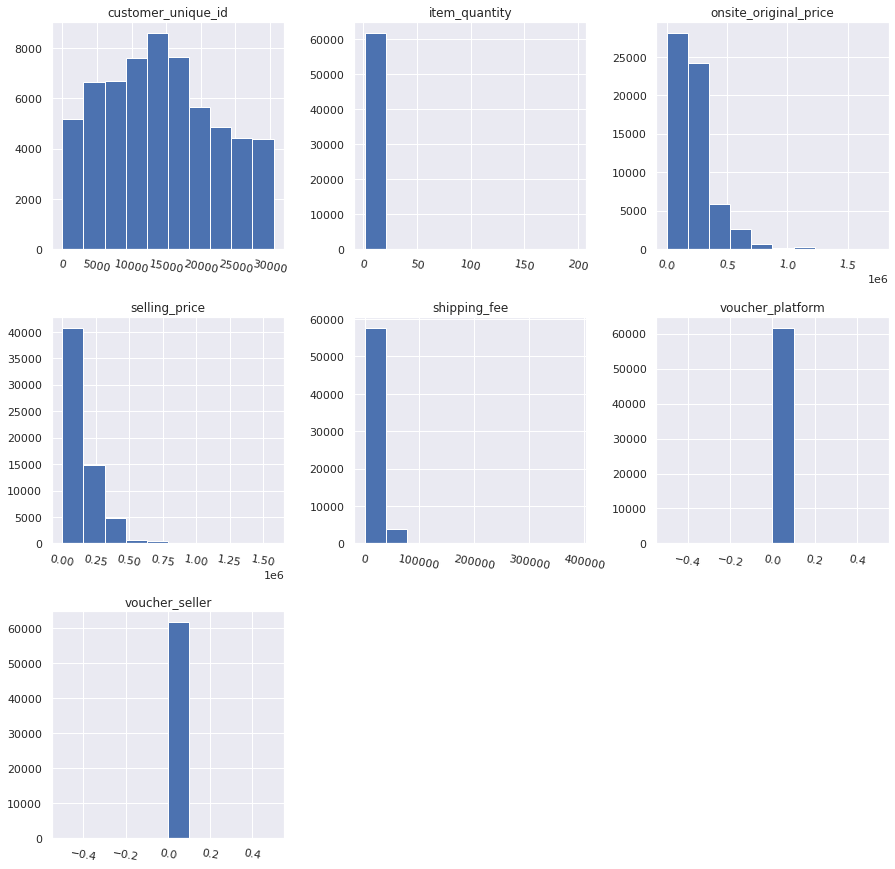

In [ ]:
# Plot a histogram grid
data.hist(figsize=(15,15), xrot=-10)

# Clear the text "residue"
plt.show()

# **Compare the two values CANCELLED and COMPLETED in the order_id column**

# **Check with t-test**

In [ ]:
df_cancel = data[data['order_status']=='CANCELLED']['shipping_fee']
df_complete = data[data['order_status']=='COMPLETED']['shipping_fee']

In [ ]:
ttest_ind(
    df_cancel,
    df_complete,
    equal_var=False,
)

Ttest_indResult(statistic=25.352642217713594, pvalue=5.708230803016258e-139)

H0: cancel = complete

H1: cancel # complete

pvalue=5.708230803016258e-139 < 0,05

=> Reject H0


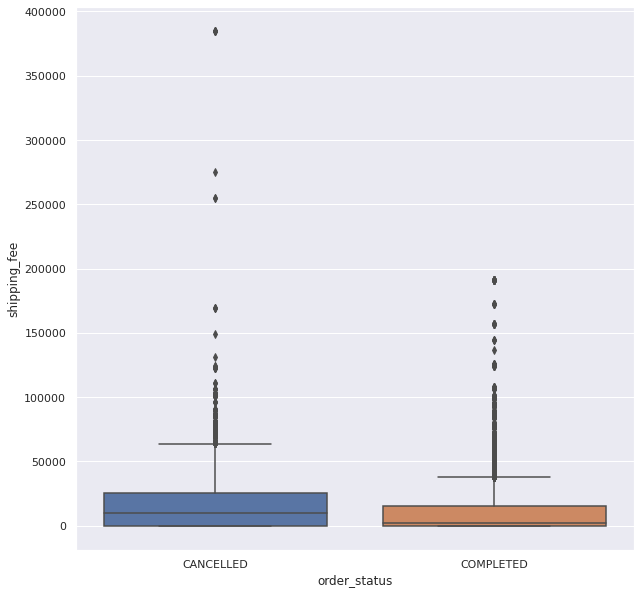

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['order_status'], y=data['shipping_fee'])

=> Looking at the chart, you can see that the number of orders CANCELLED is more than COMPLETED is because the shipping fee is too high => so pay more attention to the shipping fee, can offer more promotions on shipping fees to reduce the amount of CANCELLED

In [ ]:
data.groupby('order_status').mean()

,customer_unique_id,item_quantity,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller
order_status,,,,,,,
CANCELLED,14231.695363,1.132878,234074.182000,150766.792940,15138.297477,0.0,0.0
COMPLETED,14345.172597,1.106644,234860.128326,151654.547338,10237.513949,0.0,0.0


In [ ]:
#data[data['order_status']=='CANCELLED']

In [ ]:
#data[data['order_status']=='COMPLETED']

# **Draw Chart**

In [ ]:
df = data[['created_day', 'order_id']]
df

,created_day,order_id
0,7/1/2019,A000000001
1,7/1/2019,A000000002
2,7/1/2019,A000000003
3,7/1/2019,A000000004
4,7/1/2019,A000000005
...,...,...
61723,7/30/2019,A000037831
61724,7/30/2019,A000037832
61725,7/30/2019,A000037833
61726,7/30/2019,A000037834


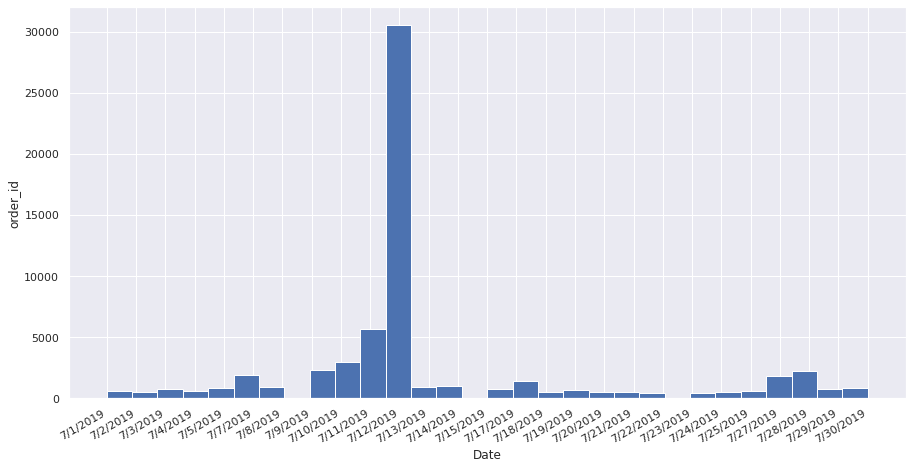

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df['created_day'], bins = 30)
plt.xlabel('Date')
plt.ylabel('order_id')

plt.gcf().autofmt_xdate()
plt.show()

=>Find out why July 12 is a day where so many people shop. Is it a special day? Maybe consider to put more promotion there

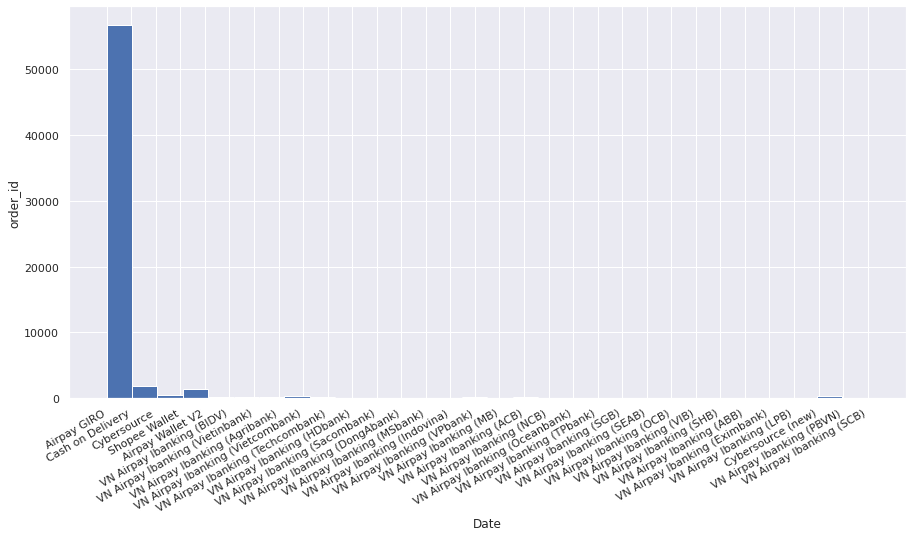

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(data['payment_method'], bins = 30)
plt.xlabel('Date')
plt.ylabel('order_id')
plt.gcf().autofmt_xdate()
plt.show()

=> Find out which payment services are used the most, so have more promotions for other payment services to attract more customers.

In [ ]:
df1 = data[['order_id','customer_unique_id','item_quantity']]
df1

,order_id,customer_unique_id,item_quantity
0,A000000001,1,1
1,A000000002,2,1
2,A000000003,3,1
3,A000000004,4,1
4,A000000005,5,1
...,...,...,...
61723,A000037831,30091,1
61724,A000037832,30511,1
61725,A000037833,30512,1
61726,A000037834,30513,1


In [ ]:
df2=df1.groupby(['customer_unique_id'])['item_quantity'].sum()

In [ ]:
df2.sort_values( ascending=False)

customer_unique_id
13080    417
4693     388
4898     217
11028    201
14977    198
        ... 
10342      1
10341      1
10340      1
24485      1
30513      1
Name: item_quantity, Length: 30513, dtype: int64

# **Do wit sample_traffic**

In [ ]:
df_traffic = pd.read_csv('sample_traffic.csv')
df_traffic

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,62.19%,3.56,176.03,0.91%,6566,6.656088e+09
1,youtube / social,77785,55537,163447,78.81%,2.24,89.94,0.59%,957,8.429079e+08
2,(direct) / (none),64653,60181,108534,55.33%,4.12,200.43,0.97%,1048,1.040851e+09
3,facebook / social,48721,32781,176662,84.40%,1.86,73.21,0.28%,500,5.344857e+08
4,youtube.com / referral,27718,17774,42464,63.92%,2.98,148.44,1.20%,508,4.025419e+08
...,...,...,...,...,...,...,...,...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,1,0,1,100.00%,1.00,0.00,0.00%,0,0.000000e+00
194,xiaomiviet.vn / local_display,1,0,2,0.00%,4.50,113.00,0.00%,0,0.000000e+00
195,xnxx.com / local_display,1,0,2,50.00%,1.50,6.00,0.00%,0,0.000000e+00
196,zalo / (not set),1,1,1,100.00%,1.00,0.00,0.00%,0,0.000000e+00


In [ ]:
df_traffic.shape

(198, 10)

In [ ]:
df_traffic.dtypes

Source / Medium               object
Users                          int64
New Users                      int64
Sessions                       int64
Bounce Rate                   object
Pages / Session              float64
Avg. Session Duration        float64
Ecommerce Conversion Rate     object
Transactions                   int64
Revenue                      float64
dtype: object

In [ ]:
df_traffic.isnull().sum()

Source / Medium              1
Users                        0
New Users                    0
Sessions                     0
Bounce Rate                  0
Pages / Session              0
Avg. Session Duration        0
Ecommerce Conversion Rate    0
Transactions                 0
Revenue                      0
dtype: int64

In [ ]:
df_traffic.isna().sum()

Source / Medium              1
Users                        0
New Users                    0
Sessions                     0
Bounce Rate                  0
Pages / Session              0
Avg. Session Duration        0
Ecommerce Conversion Rate    0
Transactions                 0
Revenue                      0
dtype: int64

In [ ]:
df_traffic['Source / Medium'] = df_traffic['Source / Medium'].fillna('Unknown')

In [ ]:
df_traffic.isna().sum()

Source / Medium              0
Users                        0
New Users                    0
Sessions                     0
Bounce Rate                  0
Pages / Session              0
Avg. Session Duration        0
Ecommerce Conversion Rate    0
Transactions                 0
Revenue                      0
dtype: int64

# Find the source/medium with the most users

In [193]:
df_users = df_traffic[['Source / Medium','Users']]
df_users

,Source / Medium,Users
0,google / cpc,407950
1,youtube / social,77785
2,(direct) / (none),64653
3,facebook / social,48721
4,youtube.com / referral,27718
...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,1
194,xiaomiviet.vn / local_display,1
195,xnxx.com / local_display,1
196,zalo / (not set),1


In [194]:
df1= df_users.sort_values( by=['Users'],ascending=False).head(20)
df1

,Source / Medium,Users
197,Unknown,657602
0,google / cpc,407950
1,youtube / social,77785
2,(direct) / (none),64653
3,facebook / social,48721
4,youtube.com / referral,27718
5,m.facebook.com / referral,14373
6,l.facebook.com / referral,3661
7,zalo / zalo,2782
8,youtube / (not set),1741


# Find the most New Users

In [195]:
df_new = df_traffic[['Source / Medium','New Users']]
df_new

,Source / Medium,New Users
0,google / cpc,344502
1,youtube / social,55537
2,(direct) / (none),60181
3,facebook / social,32781
4,youtube.com / referral,17774
...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,0
194,xiaomiviet.vn / local_display,0
195,xnxx.com / local_display,0
196,zalo / (not set),1


In [196]:
df7= df_new.sort_values( by=['New Users'],ascending=False).head(20)
df7

,Source / Medium,New Users
197,Unknown,530065
0,google / cpc,344502
2,(direct) / (none),60181
1,youtube / social,55537
3,facebook / social,32781
4,youtube.com / referral,17774
5,m.facebook.com / referral,10110
7,zalo / zalo,2400
6,l.facebook.com / referral,1712
8,youtube / (not set),875


# Find the most Bounce Rate

In [181]:
df_bounce_rate = df_traffic[['Source / Medium','Bounce Rate']]
df_bounce_rate

,Source / Medium,Bounce Rate
0,google / cpc,62.19%
1,youtube / social,78.81%
2,(direct) / (none),55.33%
3,facebook / social,84.40%
4,youtube.com / referral,63.92%
...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,100.00%
194,xiaomiviet.vn / local_display,0.00%
195,xnxx.com / local_display,50.00%
196,zalo / (not set),100.00%


In [183]:
df2= df_bounce_rate.sort_values( by='Bounce Rate',ascending=False).head(20)
df2

,Source / Medium,Bounce Rate
49,genk.vn / local_display,90.91%
35,yandex.ru / local_display,90.00%
40,cn.bing.com / local_display,85.71%
28,yandex / organic,85.71%
11,instagram / social,84.81%
3,facebook / social,84.40%
45,google.com / referral,80.00%
26,mlr.itim.vn / local_display,80.00%
51,ahrefs.tool.buyseotools.io / local_display,80.00%
66,cellphones.com.vn / local_display,80.00%


# Find the most Ecommerce Conversion Rate

In [184]:
df_ECR = df_traffic[['Source / Medium','Ecommerce Conversion Rate']]
df_ECR

,Source / Medium,Ecommerce Conversion Rate
0,google / cpc,0.91%
1,youtube / social,0.59%
2,(direct) / (none),0.97%
3,facebook / social,0.28%
4,youtube.com / referral,1.20%
...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,0.00%
194,xiaomiviet.vn / local_display,0.00%
195,xnxx.com / local_display,0.00%
196,zalo / (not set),0.00%


In [185]:
df3= df_ECR.sort_values( by='Ecommerce Conversion Rate',ascending=False).head(20)
df3

,Source / Medium,Ecommerce Conversion Rate
29,l.workplace.com / local_display,9.68%
46,news.zing.vn / local_display,7.14%
19,l.messenger.com / local_display,3.79%
15,newsletter / email,3.32%
33,vnexpress.net / local_display,2.86%
12,newsletter / email,2.81%
24,linhkiendoc.com / local_display,2.41%
13,yahoo / organic,2.23%
21,duckduckgo / organic,2.04%
50,getpocket.com / local_display,12.50%


# Find the site with the most revenue

In [186]:
df_Revenue = df_traffic[['Source / Medium','Revenue']]
df_Revenue

,Source / Medium,Revenue
0,google / cpc,6.656088e+09
1,youtube / social,8.429079e+08
2,(direct) / (none),1.040851e+09
3,facebook / social,5.344857e+08
4,youtube.com / referral,4.025419e+08
...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,0.000000e+00
194,xiaomiviet.vn / local_display,0.000000e+00
195,xnxx.com / local_display,0.000000e+00
196,zalo / (not set),0.000000e+00


In [188]:
df4= df_Revenue.sort_values( by='Revenue',ascending=False).head(20)
df4

,Source / Medium,Revenue
197,Unknown,1.004147e+10
0,google / cpc,6.656088e+09
2,(direct) / (none),1.040851e+09
1,youtube / social,8.429079e+08
3,facebook / social,5.344857e+08
4,youtube.com / referral,4.025419e+08
6,l.facebook.com / referral,1.508016e+08
5,m.facebook.com / referral,1.141888e+08
12,newsletter / email,9.891079e+07
7,zalo / zalo,3.732781e+07


# Find the most Transactions

In [189]:
df_trans = df_traffic[['Source / Medium','Transactions']]
df_trans

,Source / Medium,Transactions
0,google / cpc,6566
1,youtube / social,957
2,(direct) / (none),1048
3,facebook / social,500
4,youtube.com / referral,508
...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,0
194,xiaomiviet.vn / local_display,0
195,xnxx.com / local_display,0
196,zalo / (not set),0


In [190]:
df5= df_trans.sort_values( by='Transactions',ascending=False).head(20)
df5

,Source / Medium,Transactions
197,Unknown,10077
0,google / cpc,6566
2,(direct) / (none),1048
1,youtube / social,957
4,youtube.com / referral,508
3,facebook / social,500
5,m.facebook.com / referral,127
6,l.facebook.com / referral,103
12,newsletter / email,61
7,zalo / zalo,43


# Find the most Avg. Session Duration

In [191]:
df_avgSD = df_traffic[['Source / Medium','Avg. Session Duration']]
df_avgSD

,Source / Medium,Avg. Session Duration
0,google / cpc,176.03
1,youtube / social,89.94
2,(direct) / (none),200.43
3,facebook / social,73.21
4,youtube.com / referral,148.44
...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,0.00
194,xiaomiviet.vn / local_display,113.00
195,xnxx.com / local_display,6.00
196,zalo / (not set),0.00


In [192]:
df6= df_avgSD.sort_values( by='Avg. Session Duration',ascending=False).head(20)
df6

,Source / Medium,Avg. Session Duration
31,l.instagram.com / referral,3379.36
125,hocdientu.vn / local_display,1660.00
95,59.29.251.41 / local_display,1175.00
117,ebanking.scb.com.vn / local_display,1048.00
156,online.acb.com.vn / local_display,894.00
158,oxii.vn / local_display,781.50
6,l.facebook.com / referral,736.73
177,thiendia.com / local_display,605.60
75,r.duckduckgo.com / local_display,554.42
182,tuoitre.vn / local_display,535.47
